
# ANALISI DATI - AIRBNB NYC 2019
***Autore:*** Enrico Tortomasi
---

---

**INTRODUZIONE AIRBNB:**

Airbnb è una piattaforma online che mette in contatto persone che cercano alloggi (ospiti) con persone che mettono a disposizione alloggi (host) per brevi periodi. In pratica, permette di affittare case, appartamenti, stanze o altre tipologie di alloggi per soggiorni temporanei, spesso a prezzi più convenienti rispetto agli hotel. Gli host possono anche offrire "esperienze" oltre all'alloggio, come visite guidate o corsi di cucina.


## Obiettivo:

Obiettivo primario per le nostre analisi è quello di rispondere ad alcune domande che ci porremo al fine di trovare le strategie migliori per gli host al fine di massimizzare i profitti.

- QUALI SONO I NEIGHBOURHOOD_GROUP(QUARTIERI) PIU' REDDITIZI? E CHE CARATTERISTICHE HANNO GLI ANNUNCI IN QUELLA ZONA?

- QUALE RANGE DI PREZZO COINCIDE CON UNA MAGGIORE POPOLARITA' RISPETTO ALLA TIPOLOGIA DI STANZA?

- QUALE TIPOLOGIA DI STANZA E' PIU' REDDITIZIA RISPETTO ALLA ZONA?



---

## 🔹 1. Caricamento e Ispezione Dati
- Carica dataset
- Mostra prime righe
- Controlla info, tipi colonne, valori nulli

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

sns.set_style("whitegrid")

# Caricamento dataframe.
df = pd.read_csv("../data/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Verifico grandezza del dataframe e la sua composizione.
df.shape

(48895, 16)

In [ ]:
#Controllo i dtypes delle colonne per verificare che sia tutto della tipologia corretta.
df.dtypes
#last_review è da cambiare in datetime

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

---
## 🔹 2. Pulizia Dati
- Rimuovi duplicati e colonne irrilevanti
- Gestisci valori mancanti
- Crea nuove colonne utili
- Documenta ogni scelta

In [ ]:
#Controllo generale
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Cambio last_review in datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
#Verifica della conversione
df['last_review'].head()

0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [ ]:
#Droppo eventuali duplicati
df.drop_duplicates(inplace=True)


In [9]:
#Rimuovo le righe con name e host_name nullo, perchè sono poche e non sono affidabili per l'analisi
df = df.dropna(subset=['name','host_name'])

---
## 🔹 3. Analisi Esplorativa (EDA)
- Statistiche descrittive
- Distribuzioni
- Relazioni tra variabili
- Insight testuali sotto ogni output

**PRIMA DOMANDA:** QUALI SONO I NEIGHBOURHOOD_GROUP(QUARTIERI) PIU' REDDITIZI? E CHE CARATTERISTICHE HANNO GLI ANNUNCI IN QUELLA ZONA?

In [ ]:
#Prima analisi generale
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821,38821.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,2018-10-04 07:23:47.072976128,1.373229,7.148369,112.801425
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,2018-07-09 00:00:00,0.190000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,NaN,1.680328,32.964600,131.610962


In [ ]:
#Calcolo i profitti per ogni annuncio facendo un prodotto fra il numero di recensioni,il numero minimo di notti ed il prezzo
df['profit'] = df['number_of_reviews'] * df['price'] * df['minimum_nights']

In [ ]:
#Raggruppo per quartieri ed estrapolo il profitto da cui fare poi la media
#Manhattan, Brooklyn e Queens sono i più redditizi
quartieri_redditizzi = df.groupby('neighbourhood_group')['profit'].mean().sort_values(ascending=False)
quartieri_redditizzi

neighbourhood_group
Manhattan        16484.590999
Brooklyn         12167.880781
Queens            7157.991525
Staten Island     6929.096515
Bronx             4967.023875
Name: profit, dtype: float64

In [14]:
nhg_manhattan = df.query('neighbourhood_group == "Manhattan"').describe()
nhg_manhattan

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,profit
count,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,16621,16621.000000,21643.000000,21643.000000,2.164300e+04
mean,1.878042e+07,6.783633e+07,40.765060,-73.974605,196.897473,8.538188,20.982581,2018-09-05 09:13:47.170447360,1.271756,12.800628,112.013445,1.648459e+04
min,2.595000e+03,2.845000e+03,40.702340,-74.018510,0.000000,1.000000,0.000000,2011-12-10 00:00:00,0.010000,1.000000,0.000000,0.000000e+00
25%,9.167949e+06,8.525283e+06,40.731815,-73.991690,95.000000,2.000000,1.000000,2018-04-13 00:00:00,0.170000,1.000000,0.000000,1.200000e+02
50%,1.911790e+07,3.065628e+07,40.760880,-73.980420,150.000000,3.000000,4.000000,2019-05-08 00:00:00,0.610000,1.000000,36.000000,2.000000e+03
75%,2.954357e+07,1.069491e+08,40.795080,-73.953840,220.000000,6.000000,19.000000,2019-06-22 00:00:00,1.880000,2.000000,230.500000,9.724500e+03
max,3.648724e+07,2.743213e+08,40.876650,-73.908550,10000.000000,1250.000000,607.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000,1.116680e+07
std,1.116853e+07,7.937730e+07,0.038462,0.022138,291.489822,23.097047,42.576172,NaN,1.627705,48.253732,132.669874,1.175883e+05


In [15]:
nhg_brooklyn = df.query('neighbourhood_group == "Brooklyn"').describe()
nhg_brooklyn

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,profit
count,2.008900e+04,2.008900e+04,20089.000000,20089.000000,20089.000000,20089.000000,20089.000000,16439,16439.000000,20089.000000,20089.000000,2.008900e+04
mean,1.826347e+07,5.672601e+07,40.685034,-73.951197,124.410523,6.057693,24.201006,2018-09-25 23:08:03.314070272,1.283356,2.285231,100.235801,1.216788e+04
min,2.539000e+03,2.438000e+03,40.571150,-74.039420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000,0.000000e+00
25%,8.721414e+06,5.610823e+06,40.672600,-73.963510,60.000000,2.000000,1.000000,2018-06-20 12:00:00,0.180000,1.000000,0.000000,2.100000e+02
50%,1.888904e+07,2.291345e+07,40.687520,-73.951740,90.000000,3.000000,6.000000,2019-05-13 00:00:00,0.660000,1.000000,28.000000,1.558000e+03
75%,2.785050e+07,7.917636e+07,40.704960,-73.935920,150.000000,5.000000,25.000000,2019-06-23 00:00:00,1.980000,2.000000,188.000000,7.448000e+03
max,3.648506e+07,2.743076e+08,40.738900,-73.856760,10000.000000,999.000000,488.000000,2019-07-08 00:00:00,14.000000,232.000000,365.000000,7.046000e+06
std,1.083263e+07,7.261169e+07,0.027396,0.025488,186.936694,17.638145,44.333561,NaN,1.516297,5.275625,126.257027,9.239098e+04


In [16]:
ngh_queens = df.query('neighbourhood_group == "Queens"').describe()
ngh_queens

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,profit
count,5.664000e+03,5.664000e+03,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,4572,4572.000000,5664.000000,5664.000000,5.664000e+03
mean,2.176062e+07,9.618605e+07,40.731525,-73.872786,99.536017,5.182910,27.701624,2019-01-07 06:03:46.771653376,1.941923,4.061264,144.487288,7.157992e+03
min,1.293700e+04,3.211000e+03,40.565460,-73.959270,10.000000,1.000000,0.000000,2011-09-19 00:00:00,0.010000,1.000000,0.000000,0.000000e+00
25%,1.396914e+07,2.121601e+07,40.707405,-73.917420,50.000000,1.000000,1.000000,2019-01-01 00:00:00,0.370000,1.000000,2.000000,1.700000e+02
50%,2.256801e+07,6.827598e+07,40.744790,-73.895045,75.000000,2.000000,7.000000,2019-06-09 00:00:00,1.210000,1.000000,98.000000,1.260000e+03
75%,3.076934e+07,1.580678e+08,40.759780,-73.829608,110.000000,3.000000,32.000000,2019-06-28 00:00:00,2.790000,3.000000,286.250000,5.184750e+03
max,3.648436e+07,2.742256e+08,40.797210,-73.712990,10000.000000,500.000000,629.000000,2019-07-08 00:00:00,20.940000,103.000000,365.000000,2.010000e+06
std,1.037382e+07,8.424338e+07,0.040371,0.056975,167.128794,15.031173,51.963753,NaN,2.213320,12.447068,135.546857,4.519985e+04


**ANALISI:**

- Il reddito medio decresce in ordine: **Manhattan, Brooklyn, Queens**.

- **Manhattan** richiede un soggiorno minimo più lungo (media 8 notti), rispetto a **Brooklyn** (6 notti) e **Queens** (5 notti). Questo suggerisce una strategia più orientata a soggiorni prolungati.

- Il prezzo medio per notte è più alto a **Manhattan** (196$), seguito da **Brooklyn** (124$) e **Queens** (99$), confermando che Manhattan è il quartiere più caro.

- La deviazione standard del prezzo è molto alta in tutti e tre i quartieri: ciò indica una grande varietà di prezzi (presenza sia di annunci economici che di lusso), una deviazione stanrdard alta indica che il mercato è molto eterogeneo e offre opportunità sia per chi cerca soluzioni economiche sia per chi punta al segmento più lussurioso.

**CONCLUSIONE:**

Questi dati suggeriscono che **Manhattan** è il quartiere più redditizio e costoso, con soggiorni mediamente più lunghi e una forte variabilità dell’offerta. **Brooklyn** e **Queens** sono più accessibili, ma presentano comunque una buona varietà di prezzi e strategie di ospitalità.
Queste informazioni sono utili sia per chi vuole investire sia per chi vuole ottimizzare la propria offerta su Airbnb.



---------------------------------------------------------------------------------

**SECONDA DOMANDA:** QUALE RANGE DI PREZZO COINCIDE CON UNA MAGGIORE POPOLARITA' RISPETTO ALLA TIPOLOGIA DI STANZA?

In [ ]:
#Creo diverse fasce di prezzo
df['fascia_prezzo'] = pd.cut(df['price'], bins=[0,50,100,150,200,500,10000], labels= ['0-50','51-100','101-150','151-200','201-500','500+'])
#Calcolo la popolarità media per fascia di prezzo e tipo di stanza
popolarita = df.groupby(['room_type', 'fascia_prezzo'],observed=True)['number_of_reviews'].mean().unstack()
popolarita

fascia_prezzo,0-50,51-100,101-150,151-200,201-500,500+
room_type,,,,,,
Entire home/apt,26.154255,26.455479,24.947297,24.465324,18.112496,11.998880
Private room,19.905498,26.205997,28.433553,20.115331,10.047872,3.783217
Shared room,17.729198,17.493225,10.237288,6.964286,8.000000,2.500000


**ANALISI:**

Rispettivamente abbiamo maggior popolarità per queste tipologie di stanze e fasce di prezzo:

- **Entire Home/Apt** con prezzo da 0$ a 200$
- **Private Room** con prezzo da 51$ a 150$
- **Shared Room** con prezzo da 0$ a 100$

Con **Private Room** che risulta essere la più popolare fra le 3 categorie nella fascia di prezzo, seguita da **Entire Home/apt** e infine **Shared Room** che è invece la meno popolare fra tutte.

**CONCLUSIONE:**

Conviene investire maggiormente in **Private Room** con fascia di prezzo dai 51$ a 150$, mentre in **Entire Home/Apt** solo se in fasce di prezzo minore di 50$ o superiore a 150$.

--------------------------------------------------------------------------

**TERZA DOMANDA:**  QUALE TIPOLOGIA DI STANZA E' PIU' REDDITIZIA RISPETTO ALLA ZONA?

In [41]:
#Raggruppo per tipologia di stanza e zona, per poi fare la media del profitto
stanza_zona_profitto = df.groupby(['room_type','neighbourhood_group'])['profit'].mean().unstack()
stanza_zona_profitto

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,8720.431217,19779.303046,21699.371494,11493.044847,10145.028409
Private room,3197.719325,5422.939741,8667.449015,4812.692285,4244.473404
Shared room,472.084746,1434.518160,3032.754167,1185.196970,118.555556


**ANALISI:**

Dai dati possiamo osservare come ci sia un profitto omogeneo in tutte e 3 le tipologie di stanze nei vari quartieri, abbiamo rispettivamente un maggior profitto in ordine decrescente a **Manhattan**,**Brooklyn** e **Queens**.

**CONCLUSIONE:**

Non c'è molto da dire a riguardo, ma possiamo constatare come il profitto delle varie tipologie di stanze nelle zone coincide equamente con le analisi precedentemente fatte sui quartieri più redditizzi che appunto sono **Manhattan**,**Brooklyn** e **Queens**.
Quindi questa è un'ulteriore conferma sulle conclusioni precendetemente appurate.

---
## 🔹 4. Visualizzazioni
- Grafici bar/line/boxplot per trend
- Heatmap per correlazioni
- Etichette e titoli chiari

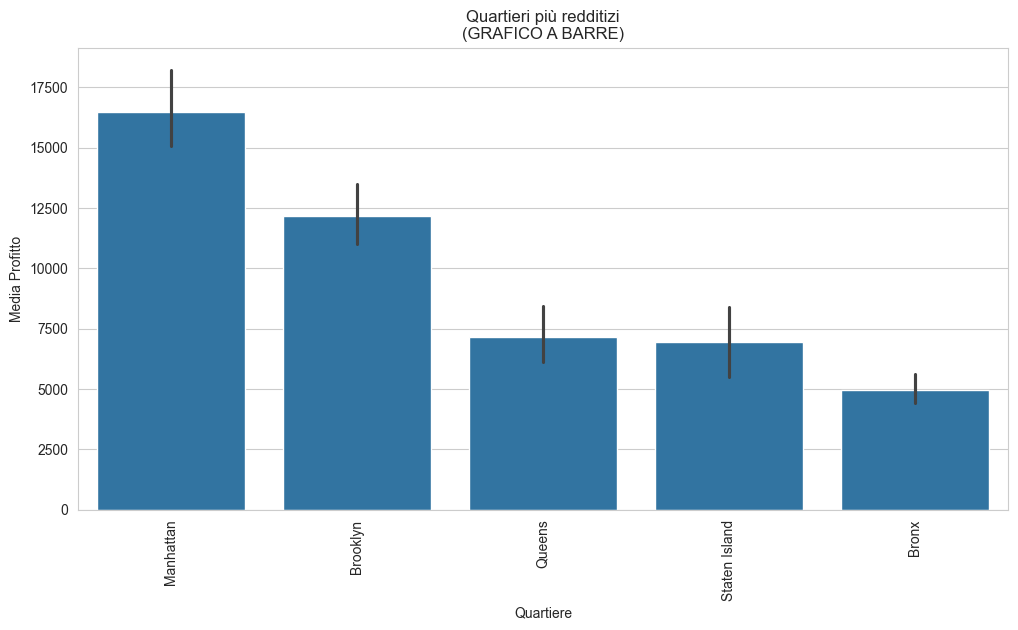

In [61]:
#GRAFICO DEI QUARTIERI PIU' REDDITIZI
plt.figure(figsize=(12,6))
sns.barplot(data = df, x ='neighbourhood_group', y='profit',order= quartieri_redditizzi.index)
plt.xticks(rotation= 90)
plt.xlabel('Quartiere')
plt.ylabel('Media Profitto')
plt.title('Quartieri più redditizi\n(GRAFICO A BARRE)')
plt.show()

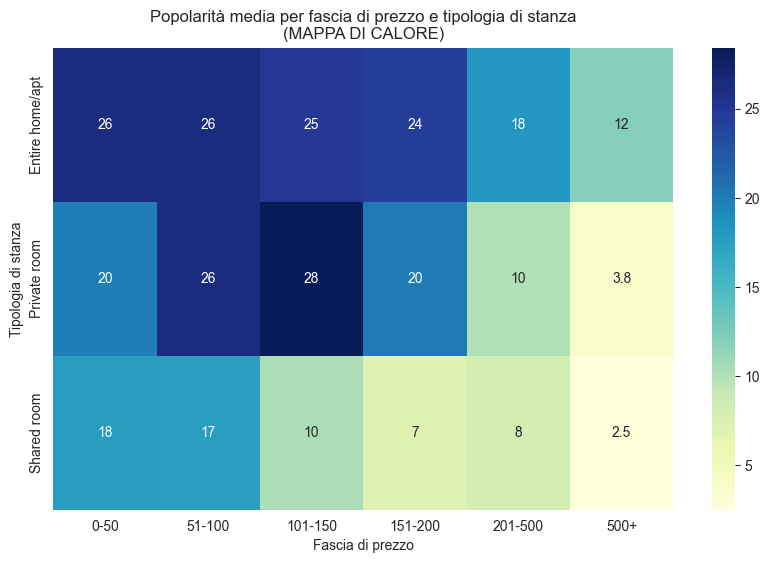

In [65]:
#GRAFICO DELLA POPOLARITA' MEDIA PER FASCIA DI PREZZO DELLE TIPOLOGIE DI STANZE
plt.figure(figsize=(10,6))
sns.heatmap(popolarita, annot= True ,cmap="YlGnBu")
plt.title("Popolarità media per fascia di prezzo e tipologia di stanza\n(MAPPA DI CALORE)")
plt.xlabel("Fascia di prezzo")
plt.ylabel("Tipologia di stanza")
plt.show()

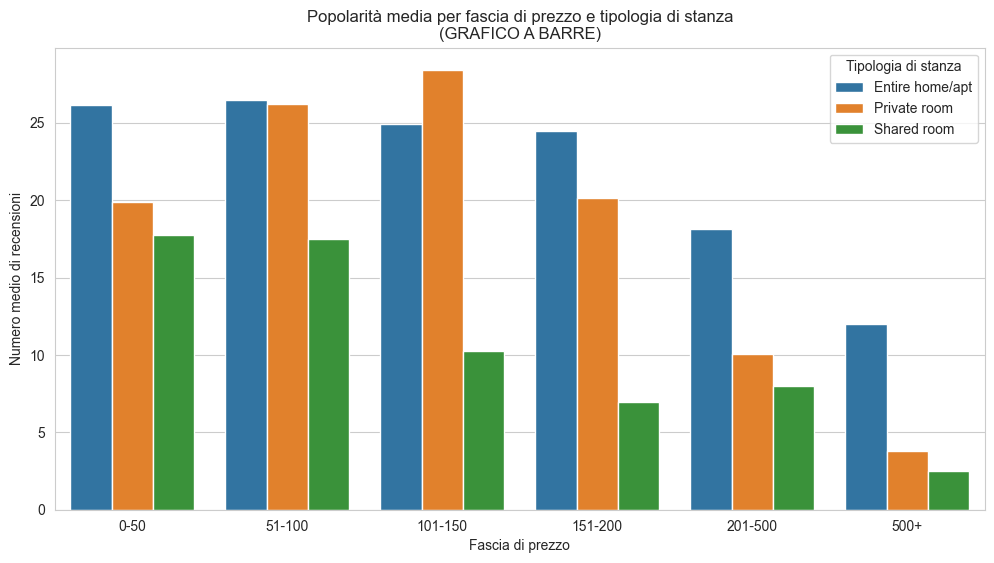

In [59]:
#GRAFICO ALTERNATIVO DI CUI SOPRA, PER MAGGIORE CHIAREZZA
popolarita_reset = popolarita.reset_index().melt(id_vars='room_type', var_name='fascia_prezzo', value_name='popolarita_media')
plt.figure(figsize=(12,6))
sns.barplot(data=popolarita_reset, x='fascia_prezzo', y='popolarita_media', hue='room_type')
plt.title("Popolarità media per fascia di prezzo e tipologia di stanza\n(GRAFICO A BARRE)")
plt.xlabel("Fascia di prezzo")
plt.ylabel("Numero medio di recensioni")
plt.legend(title="Tipologia di stanza")
plt.show()

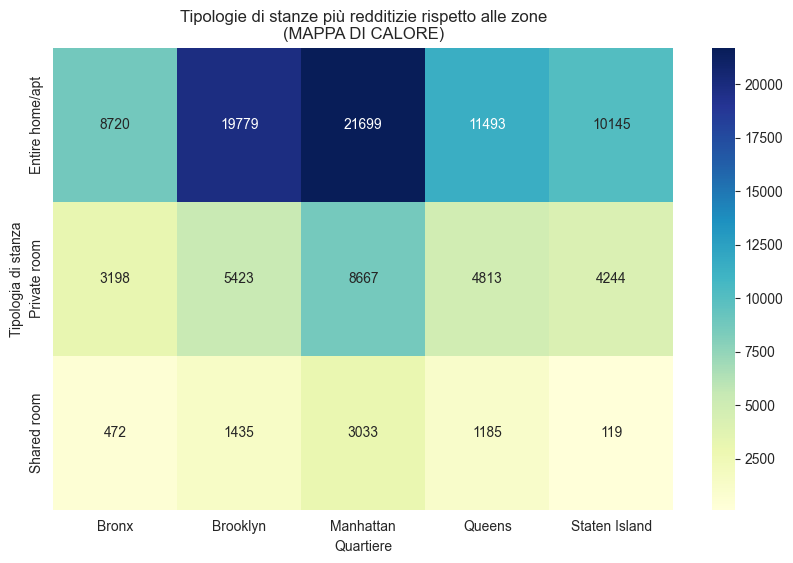

In [58]:
#GRAFICO SULLE TIPOLOGIE DI STANZE PIU' REDDITIZIE RISPETTO ALLE ZONE
plt.figure(figsize=(10,6))
sns.heatmap(stanza_zona_profitto, annot=True,cmap='YlGnBu',fmt='.0f')
plt.title('Tipologie di stanze più redditizie rispetto alle zone\n(MAPPA DI CALORE)')
plt.xlabel('Quartiere')
plt.ylabel('Tipologia di stanza')
plt.show()

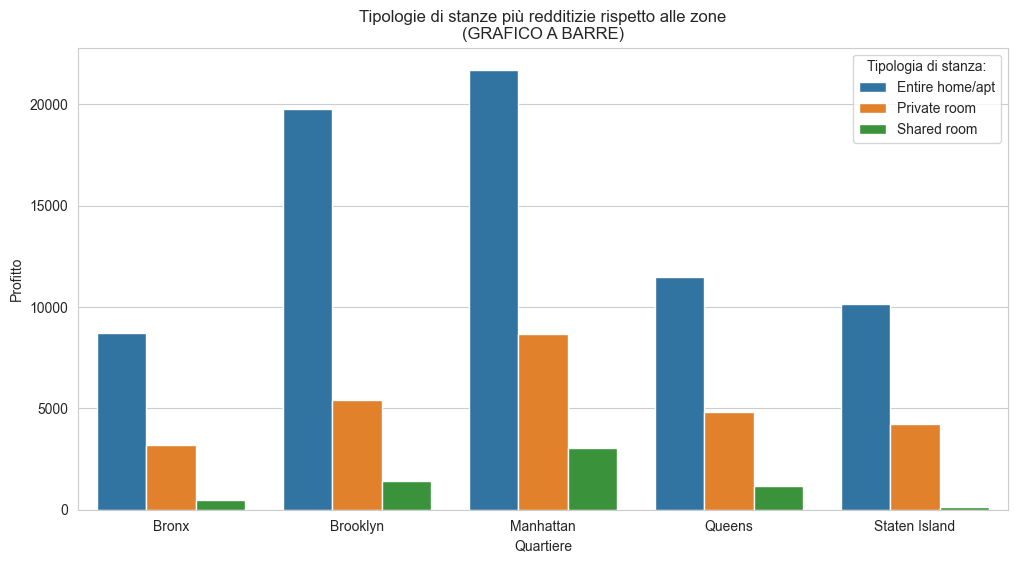

In [57]:
#GRAFICO ALTERNATIVO DI CUI SOPRA, PER MAGGIORE CHIAREZZA
stanza_zona_profitto_reset = stanza_zona_profitto.reset_index().melt(id_vars='room_type',var_name='neighbourhood_group',value_name='profit' )
plt.figure(figsize=(12,6))
sns.barplot(data=stanza_zona_profitto_reset,x='neighbourhood_group',y='profit',hue='room_type')
plt.title('Tipologie di stanze più redditizie rispetto alle zone\n(GRAFICO A BARRE)')
plt.legend(title='Tipologia di stanza:')
plt.xlabel('Quartiere')
plt.ylabel('Profitto')
plt.show()

---
## 🔹 5. Conclusioni e Raccomandazioni


- **Manhattan è il quartiere più redditizio e costoso**, con soggiorni mediamente più lunghi e una forte variabilità dei prezzi. Brooklyn e Queens offrono comunque buone opportunità, ma con prezzi e profitti medi più bassi.

- **Le Private Room nella fascia di prezzo 51–150$ sono le più popolari** (più recensioni), mentre le Entire Home/Apt sono preferite nelle fasce di prezzo più basse o molto alte.

- **Il profitto medio segue l’ordine dei quartieri**: Manhattan > Brooklyn > Queens, indipendentemente dalla tipologia di stanza.


**RACCOMANDAZIONI BUSINESS**

- **Investire in Manhattan** può garantire profitti più alti, ma richiede un’offerta competitiva e una gestione attenta dei prezzi.


- **Puntare sulle Private Room nella fascia 51–150$** è una strategia vincente per massimizzare la popolarità degli annunci.


- **Diversificare l’offerta in Brooklyn e Queens** può essere interessante per chi cerca meno concorrenza e maggiore accessibilità.


**LIMITI DELL'ANALISI**


- Il calcolo del profitto è una stima basata su prezzo, numero di recensioni e notti minime: **non tiene conto di costi fissi, tasse, stagionalità o spese di gestione**.


- I dati si riferiscono al 2019 e potrebbero non riflettere le dinamiche attuali del mercato.


- Possibili outlier nei prezzi e nei profitti possono influenzare le medie.


**IN SINTESI:**

L’analisi fornisce una panoramica chiara delle opportunità e delle strategie migliori per investire o ottimizzare la propria offerta su Airbnb a New York.